# This notebook is to draw and redraw experiments


### experiment with deltas

In [1]:
%load_ext autoreload
%autoreload 2

To draw the result of the experiment, the first cell is executed, in which the desired `exp_name` is selected. Beautiful names for algorithms are selected in the cell below. And there, algorithms are selected that will not be displayed in the cell. For each algorithm from `agent_name_old` there is a beautiful name in `agent_names_pretty'. And `ignore` contains the names of algorithms that are not displayed on the graph.

In [2]:
import json

# exp_name = "delta_light"
exp_name = "delta_heavy"
filename = f"{exp_name}.json"
with open(filename, "r") as f:
    data = json.load(f)

agent_names_old = data['0.0'].keys()

print(f"algorithm names: {agent_names_old}")

algorithm names: dict_keys(['SGD-UCB 0.1', 'SGD-UCB-Median 0.1', 'SGD-UCB-SMoM 0.1', 'RUCB', 'APE', 'APE +0.25', 'APE 2', 'Heavy-Inf'])


In [3]:
"""
for light tail
"""

if exp_name == "delta_light":
    agent_names_pretty = [
            "UCB",
            "UCB c=1.0",
            "SGD-UCB",
            "SGD-UCB 0.2",
            "SGD-UCB-Median",
            "SGD-UCB-Median",
            "SGD-UCB-SMoM",
            "SGD-UCB-SMoM",
            "RUCB",
            # "APE",
            # r"APE $p = 1.25 + \alpha$",
            # r"APE, $p = 2$",
            # "Heavy-Inf"
    ]

    ignore = [
            # "UCB c=0.1",
            "UCB 1.0",
            "SGD-UCB 0.1",
            # "SGD-UCB 0.2",
            "SGD-UCB-Median 0.1",
            # "SGD-UCB-Median 0.2",
            "SGD-UCB-SMoM 0.1",
            # "SGD-UCB-SMoM 0.2",
            # "RUCB",
            # "APE",
            # "APE +0.25",
            # "APE 2",
            # "Heavy-Inf"
    ]
    
elif exp_name == "delta_heavy":
    """
    for heavy tail
    """
    ['SGD-UCB 0.1', 'SGD-UCB-Median 0.1', 'SGD-UCB-SMoM 0.1', 'RUCB', 'APE', 'APE +0.25', 'APE 2', 'Heavy-Inf']
    agent_names_pretty = [
            "SGD-UCB",
            "SGD-UCB-Median",
            "SGD-UCB-SMoM",
            "RUCB",
            "APE",
            r"APE $p = 1.25 + \alpha$",
            r"APE, $p = 2$",
            "Heavy-Inf"
    ]

    ignore = [
            # "UCB c=0.1",
            # "UCB c=1.0",
            # "SGD-UCB 0.1",
            # "SGD-UCB 0.2",
            # "SGD-UCB-Median 0.1",
            # "SGD-UCB-Median 0.2",
            # "SGD-UCB-SMoM 0.1",
            # "SGD-UCB-SMoM 0.2",
            # "RUCB",
            "APE",
            # "APE +0.25",
            # "APE 2",
            "Heavy-Inf"
    ]
else:
    raise ValueError("there is no such experiment")

assert len(agent_names_pretty) == len(agent_names_old)

assert set(ignore) <= set(agent_names_old)

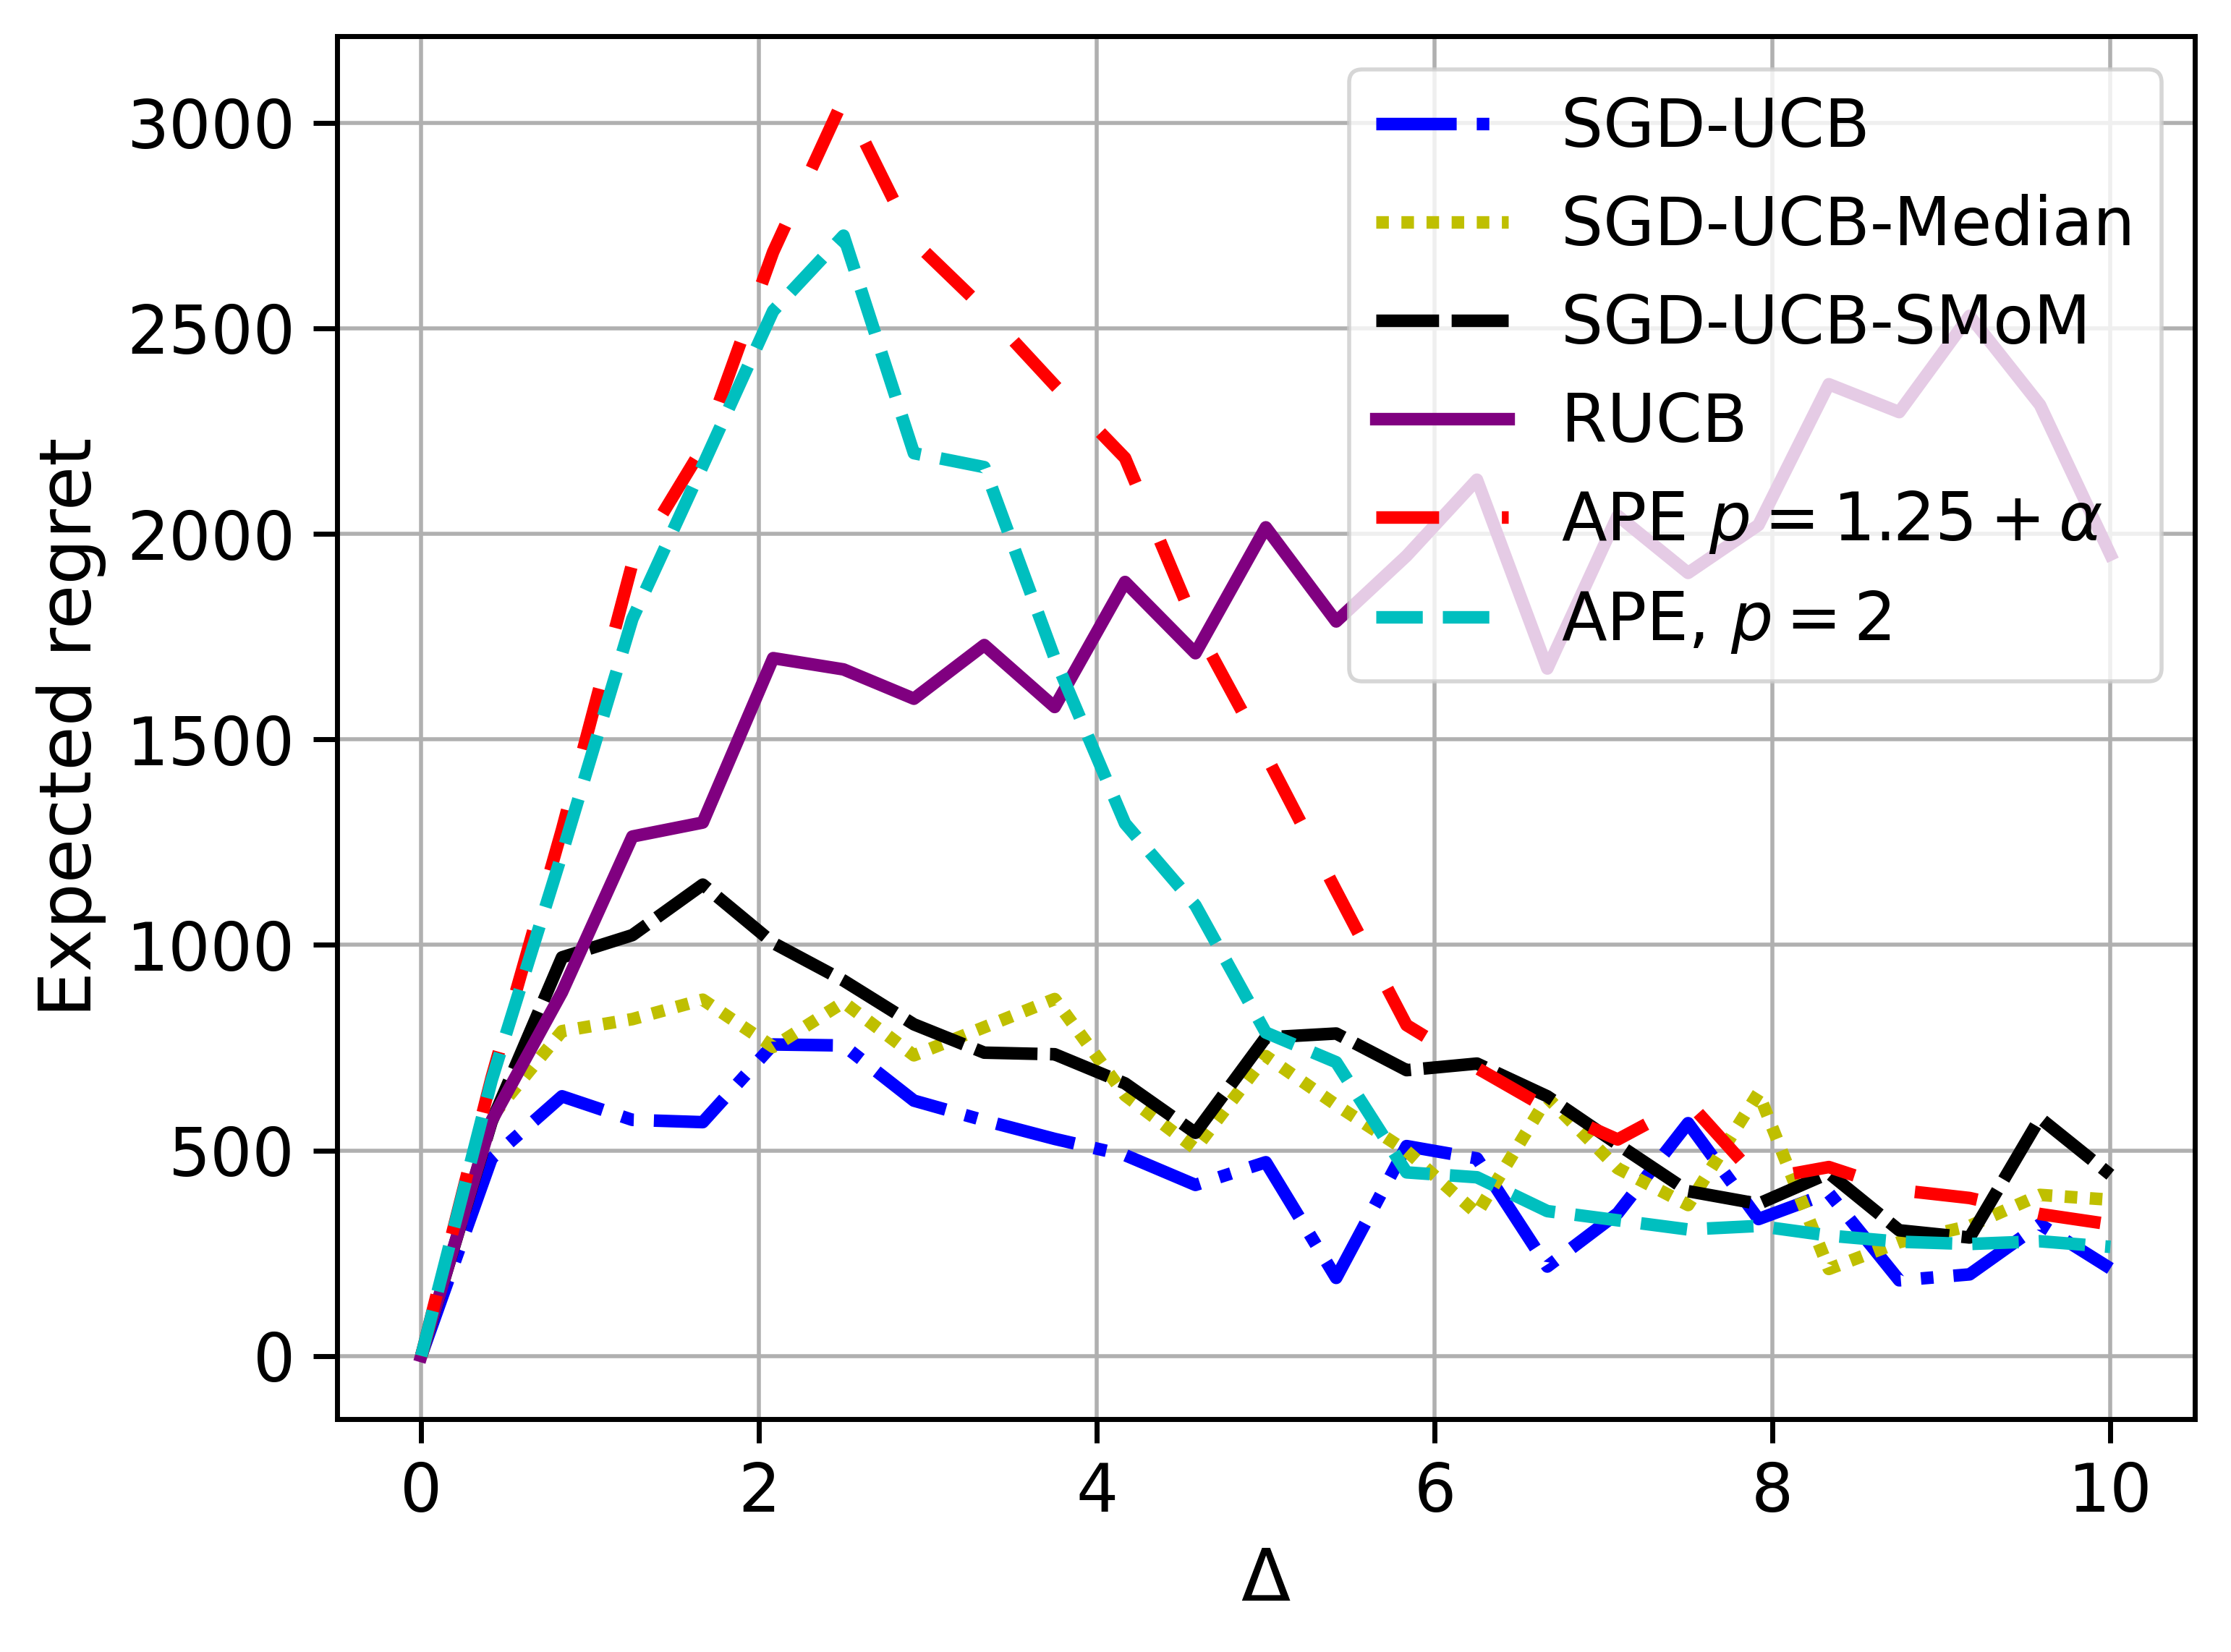

In [6]:
from experiment_helpers import delta_tail_draw
from experiment_helpers import drawer
from pathlib import Path

fig = delta_tail_draw.draw(filename, agent_names_pretty, ignore)

drawer.savefig(fig, Path("./"), exp_name)

### runtime comparison

In [1]:
import json

fname = "runtime_comp.json"

with open(fname, "r") as f:
    res = json.load(f)


import pandas as pd
import numpy as np
columns = ["Algorithms", r"Runtime for $RT /T = 0.1$, ms.",
           r"$\#$ fails",
           r"Runtime for $RT /T = 0.05$, ms.",
           r"$\#$ fails ",]

strs = []
for alg, rez in res.items():
    tmp = ["\texttt{"+ alg+"}"]
    for i in range(2):
        if len(rez['thresholds_times'][i]) == 0:
            res_time = None
        else:
            res_time = f"{(float(np.quantile(rez['thresholds_times'][i], 0.9)*1000)//1)/10}"
        tmp.append(res_time)
        tmp.append(f"{rez['num_failures'][i]}")
    # rez['thresholds_times'][i]
    strs.append(tmp)

df = pd.DataFrame(strs, columns=columns)#.iloc[[0,1,2,3, 6]]
df.to_latex("runtimes_table.txt")
df


FileNotFoundError: [Errno 2] No such file or directory: 'runtime_comp.json'

### many arms runtime comparison

In [2]:
import json

fname = "m_arm_runtime_3.json"

with open(fname, "r") as f:
    res2 = json.load(f)

In [4]:
res2['20000'] = {'10': {'HTINF': 426.43}}

In [5]:
res2

{'5000': {'10': {'HTINF': 100.72219657897949}},
 '10000': {'10': {'HTINF': 211.4707646369934}},
 '20000': {'10': {'HTINF': 426.43}}}

In [8]:
for k in res.keys():
    d1, d2 = res[k], res2[k]
    for k2 in d2.keys():
        d1[k2].update(d2[k2])

In [9]:
fname = "m_arm_runtime.json"

with open(fname, "w") as f:
    json.dump(res, f)

In [3]:
import json

fname = "m_arm_runtime.json"
# fname = "compare_2.json"
with open(fname, "r") as f:
    res = json.load(f)


import pandas as pd
import numpy as np
columns = ["Algorithms", "pretty_name", r"T, $\#$ steps", r"$\#$ arms", "Runtime, s."]

strs = []
for T, rez in res.items():
    for n_arms, rez2 in rez.items():
        for alg_name, runtime in rez2.items():
            tmp = ["\texttt{"+ alg_name+"}", alg_name, int(T), int(n_arms), float(runtime)]
            strs.append(tmp)

df = pd.DataFrame(strs, columns=columns)#.iloc[[0,1,2,3, 6]]
df.to_latex("runtimes_table.txt")
# df


In [38]:
from matplotlib.colors import BoundaryNorm, ListedColormap

labels = df[r"$\#$ arms"].unique()
colors = ListedColormap(['blue', 'green', 'yellow', 'orange', 'red'])
norm = BoundaryNorm(labels, colors.N)

In [49]:
labels = df[r"$\#$ arms"].unique()
np.concat([labels - 0.5, np.array([labels[-1] + 0.5])])

array([9.50000e+00, 9.99500e+02, 4.99950e+03, 9.99950e+03, 1.00005e+04])

/tmp/ipykernel_3042232/743010984.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  figures[i][1].legend(bbox_to_anchor=(0.1, 0.5)) #(loc = "upper left")


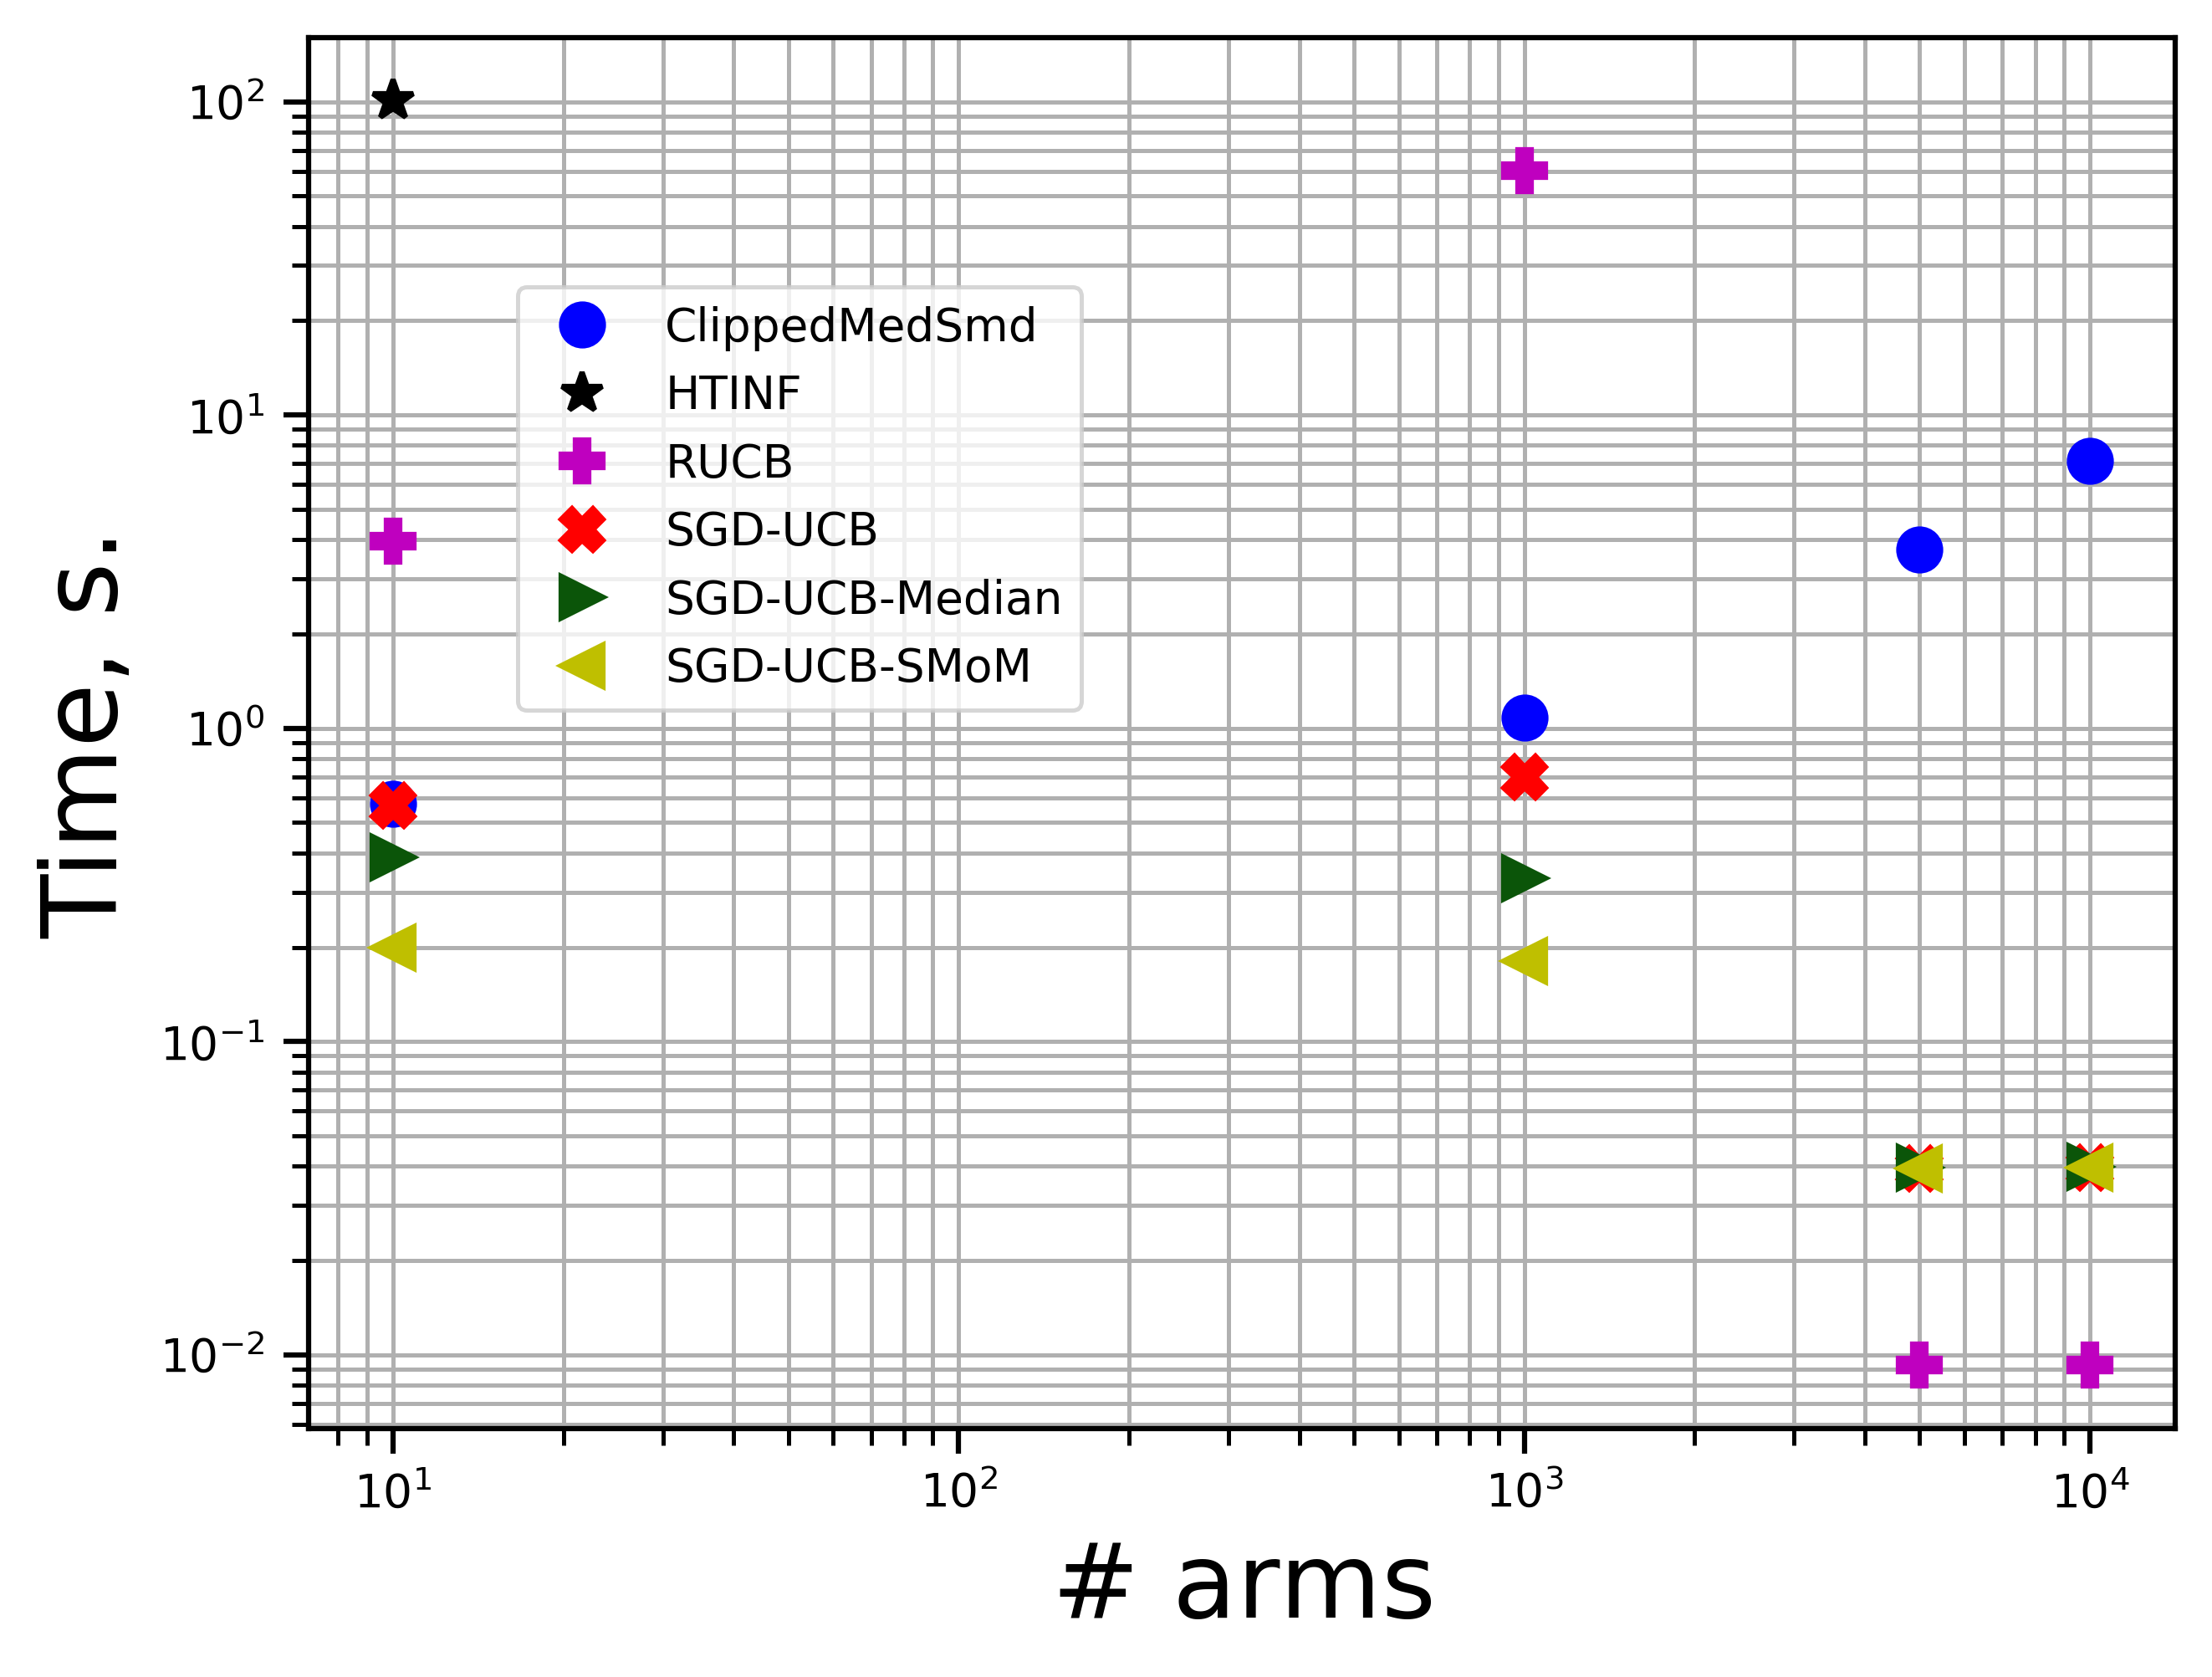

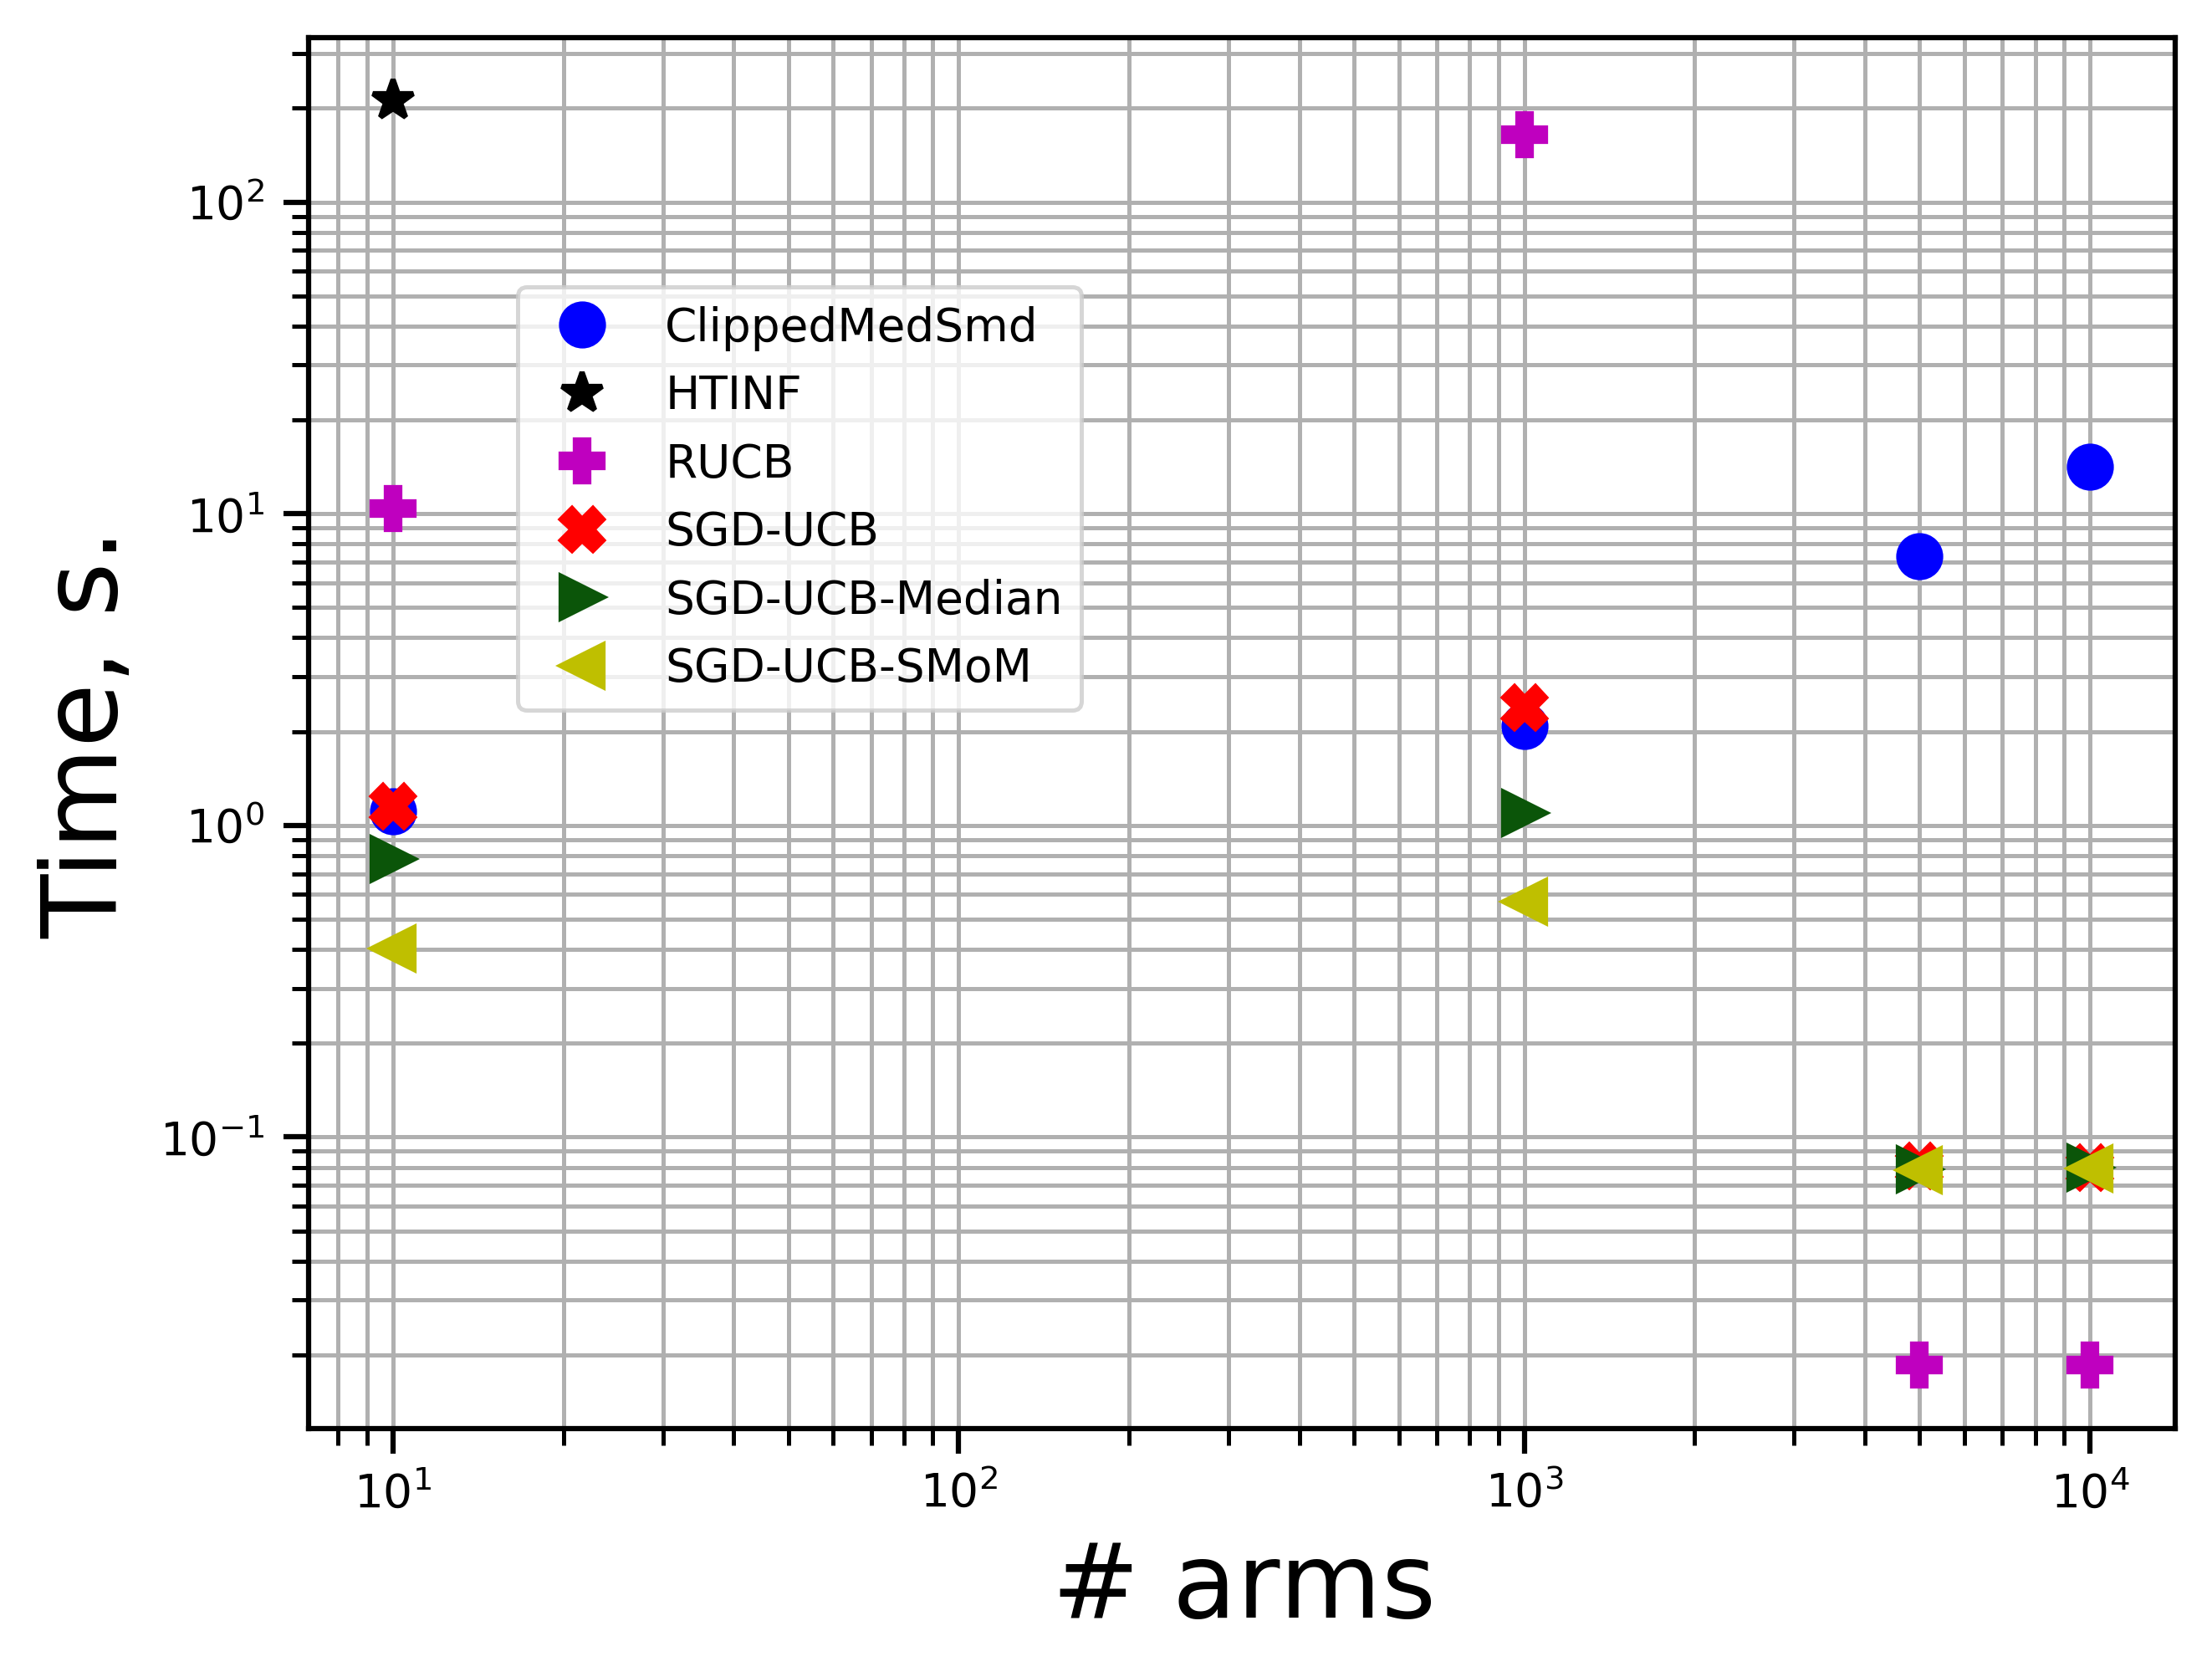

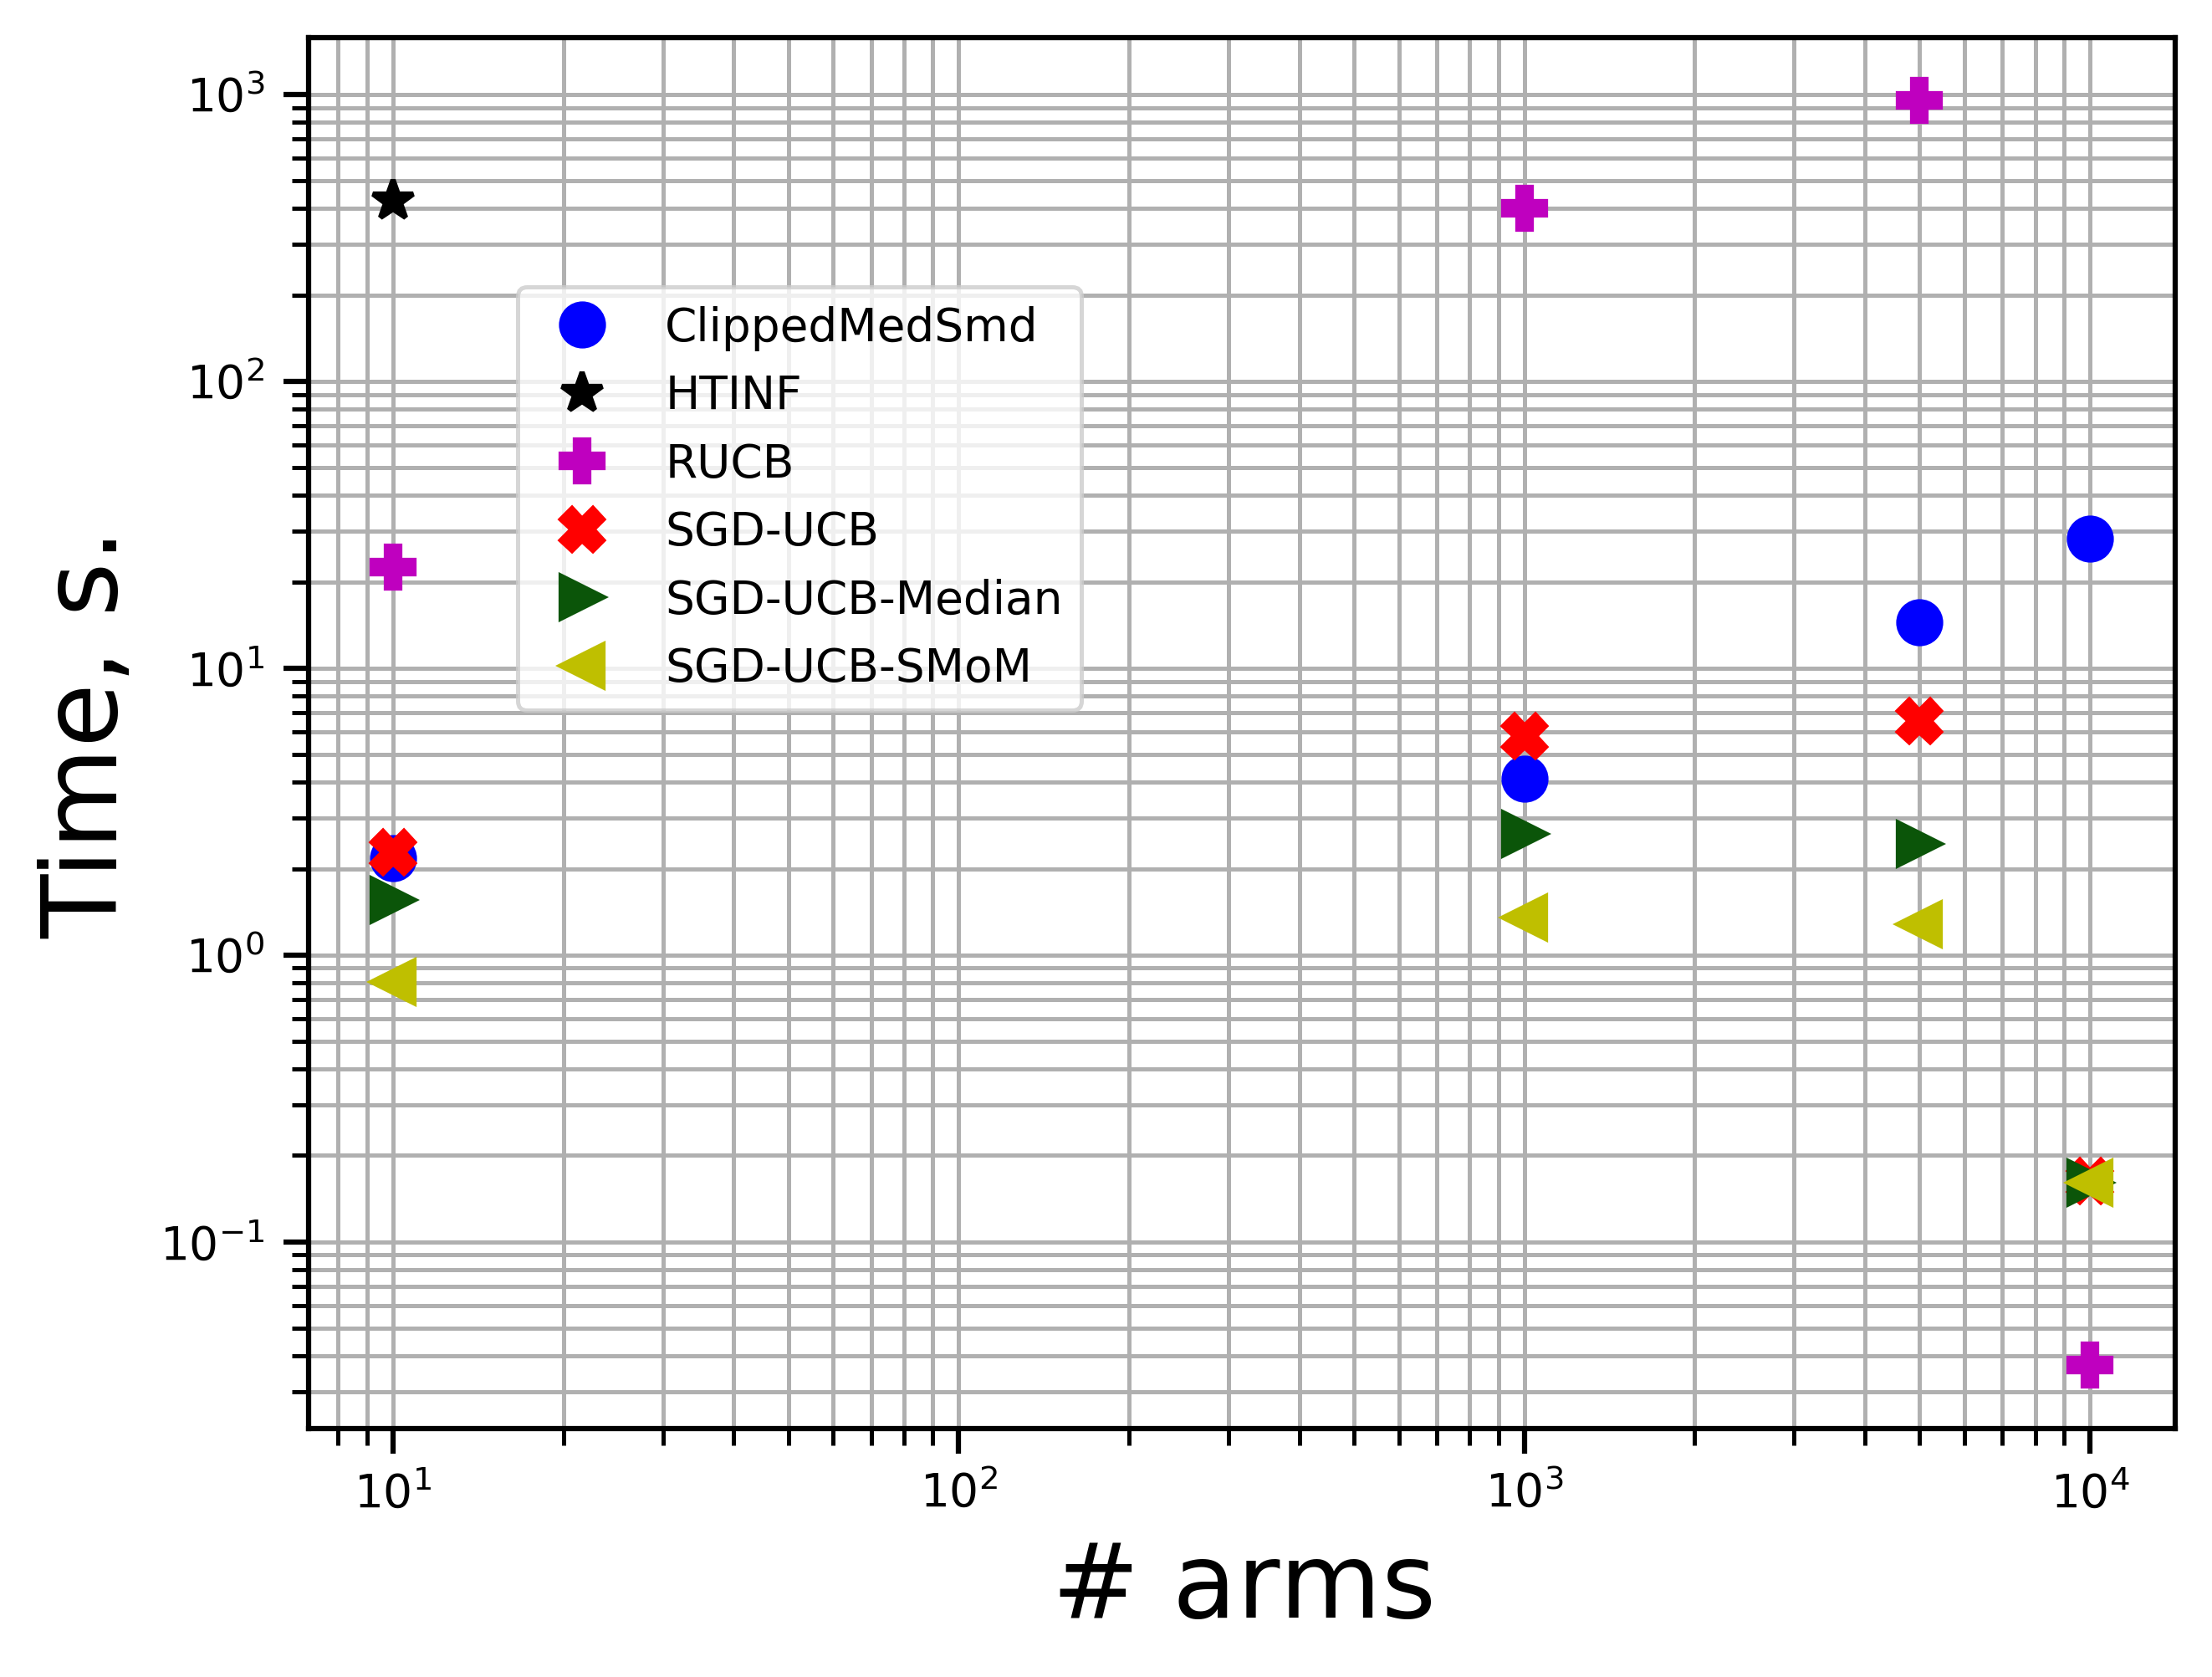

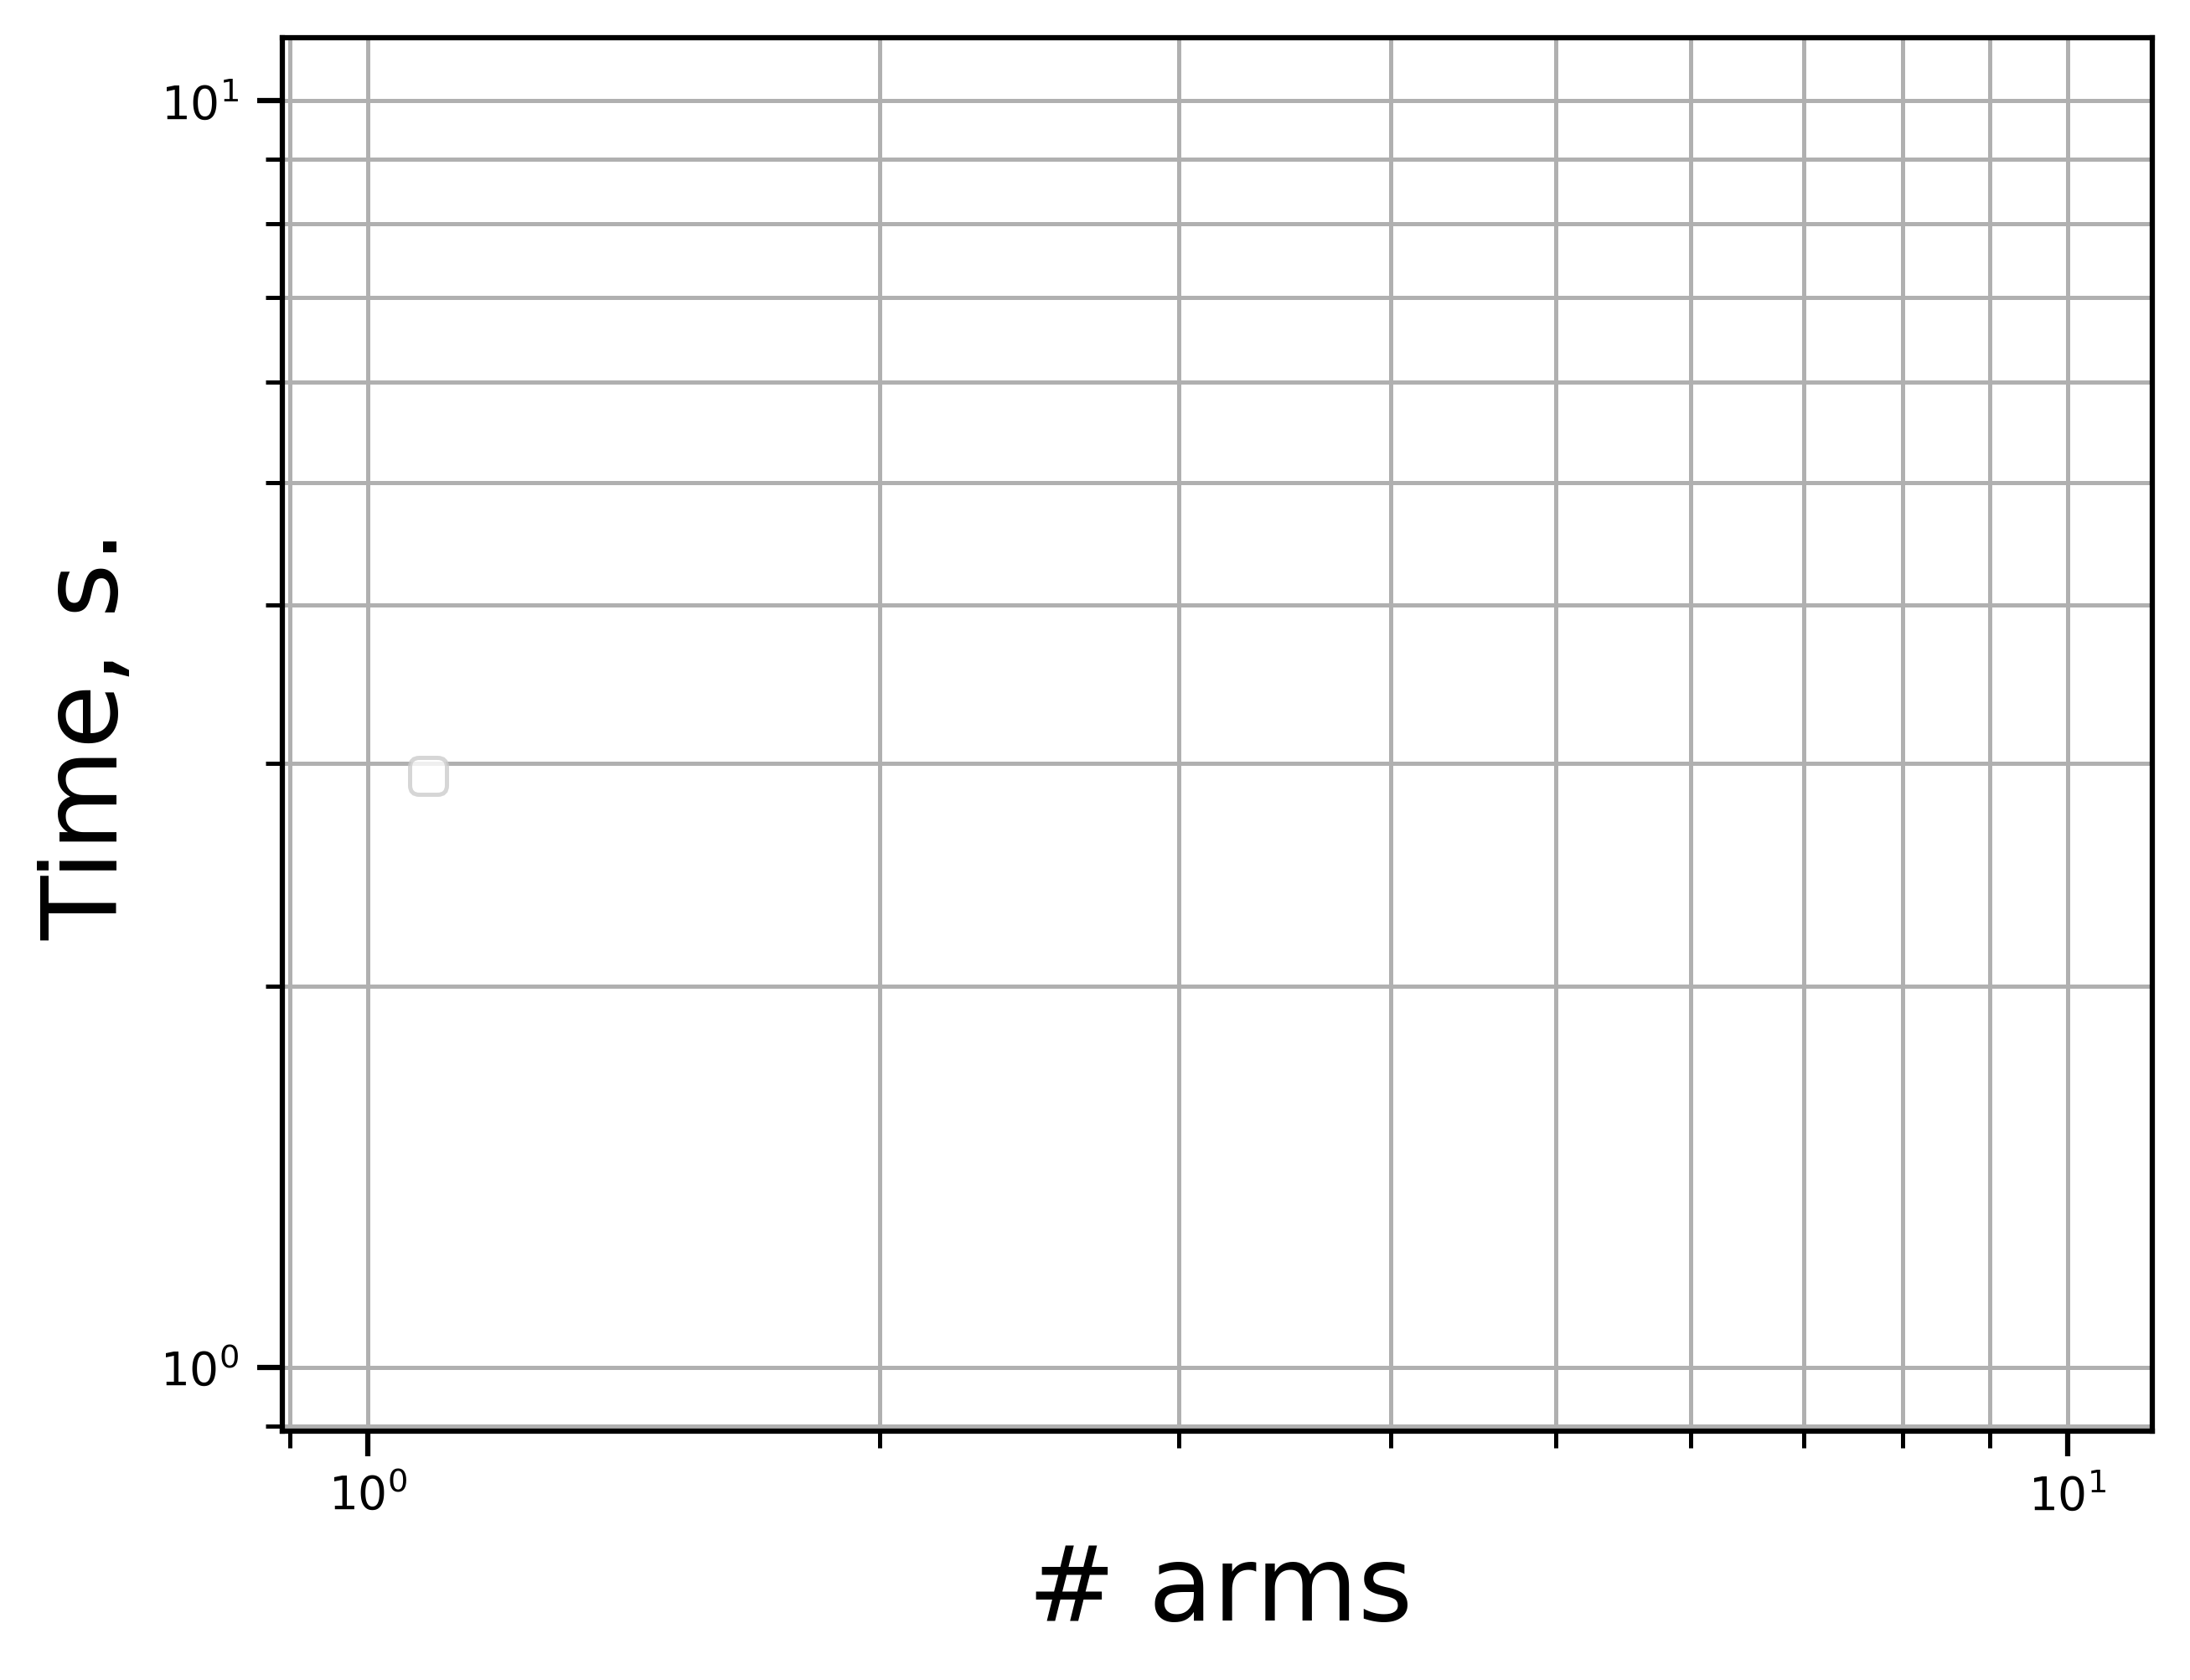

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
from experiment_helpers import drawer

def get_fig_set_style(lines_count):
    params = {
            # "legend.fontsize": 40,
            # "lines.markersize": 10,
            "axes.labelsize": 15,
            "axes.titlesize": 15,
            # "xtick.labelsize": 10,
            # "ytick.labelsize": 10,
            "font.size": 20,
            #  "text.usetex": True
        }
    colors_list = ["blue", "black", "m", "red", "#0b5509", "y", "g", "y", "c", "g"]
    sns.set_context("paper", rc=params)
    fig, ax = plt.subplots(dpi=450)
    plt.grid(which="both")
    return fig, ax, colors_list


names = ['RUCB', "SGD-UCB", 'SGD-UCB-Median','SGD-UCB-SMoM','Clipped Med', "HTINF"]
tags = [ 'o', '*', "P", "X", ">", "<"]

figures = [get_fig_set_style(5) for _ in range(4)] # figures[i] -> (fig, ax)
colors = figures[0][2]
for tag, name, color, elem in zip(tags, names, colors, df.groupby("Algorithms")):
    # print(name)
    for num, in_elem in enumerate(elem[1].groupby(r"T, $\#$ steps")):
        name = elem[1]["pretty_name"].values[0]
        if name[-1].isdigit():
            name = name[:-4]
        x = in_elem[1][r"$\#$ arms"]
        y = in_elem[1]['Runtime, s.']
        # values = elem[1].iloc[:,3]
        figures[num][1].plot(x, y, tag, label = name, color = color, markersize=8)
        
        # figures[num][0].suptitle(rf"$\#$ arms: {in_elem[0]}")

for i in range(4):
    figures[i][1].legend(bbox_to_anchor=(0.1, 0.5)) #(loc = "upper left")
    figures[i][1].set_yscale("log")
    figures[i][1].set_xscale("log")
    figures[i][1].set_xlabel(r"$\#$ arms")
    figures[i][1].set_ylabel("Time, s.")

In [10]:
from pathlib import Path
names = [10, 1000, 5000,10_000]

for name, fig in zip(names, figures):
    name = f"{name}_arms"
    fig = fig[0]
    drawer.savefig(fig, Path("./"), name)

### environments with different noises

In [5]:
import json
from experiment_helpers import drawer
from pathlib import Path
import os
import matplotlib.pyplot as plt

exp_path = Path("experiments")
exp_name = "EXP_NAME"
figures_path = Path("figures")

if not figures_path.exists():
    os.mkdir(figures_path)
for rew_type in range(2):
    for env_type in range(1):
        run_name = f"{exp_name}__reward_{rew_type}_env_{env_type}"
                
        with open(exp_path/run_name/"rez.json", 'r') as f:
            rrez = json.load(f)
        print(rrez.keys())
        alg_names = [
            # 'UCB 0.1',
        #     # 'UCB 1.0',
        #     'SGD-UCB 0.1',
        #     # 'SGD-UCB 0.2',
        #     'SGD-UCB-Median 0.1',
        #     # 'SGD-UCB-Median 0.2',
        #     'SGD-UCB-SMoM 0.1',
        #     # 'SGD-UCB-SMoM 0.2',
        #     'RUCB-Median',
        #     'APE +0.25',
        #     'APE 2'
        ]
        alg_legend_names = [
            'UCB',
        #     # 'UCB 1.0',
        #     'SGD-UCB',
        #     # 'SGD-UCB 0.2',
        #     'SGD-UCB-Median',
        #     # 'SGD-UCB-Median 0.2',
        #     'SGD-UCB-SMoM',
        #     # 'SGD-UCB-SMoM 0.2',
        #     'RUCB-Median',
        #     r'APE, $p = 1.25 + \alpha$',
        #     r'APE, $p=2$'
        ]
        # print(rrez.keys())
        # rrez = {nice_name: rrez[name] for name, nice_name in zip(alg_names, alg_legend_names) if name in rrez.keys()}
        
        figs, _ = drawer.plot(rrez, with_legend = (rew_type == 0))
        
        fig_save_path = figures_path/run_name
        if not fig_save_path.exists():
            os.mkdir(fig_save_path)
        for name, fig in figs.items():
            drawer.savefig(fig, fig_save_path, name)
            plt.close(fig)

dict_keys(['UCB 0.1'])
dict_keys(['UCB 0.1'])


<Figure size 1700x800 with 0 Axes>

<Figure size 1700x800 with 0 Axes>

<Figure size 1700x800 with 0 Axes>

<Figure size 1700x800 with 0 Axes>

In [13]:
from numba.typed import List
from numba import float64

# Создание списка списков, все элементы которого являются typed.List
nested_list = List([List.empty_list(float64) for i in range(4)])

print(nested_list)

[[, ...], [, ...], [, ...], [, ...], ...]


In [17]:
nested_list[0].append(3)
nested_list[0]

ListType[float64]([3.0, 3.0, 3.0, 3.0, ...])